In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("student-mat.csv", delimiter=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


delimiter is not "," so we tune up ";"

In [4]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,385,386,387,388,389,390,391,392,393,394
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,...,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS
sex,F,F,F,F,F,M,M,F,M,M,...,F,F,F,F,F,M,M,M,M,M
age,18,17,15,15,16,16,16,17,15,15,...,18,18,19,18,18,20,17,21,18,19
address,U,U,U,U,U,U,U,U,U,U,...,R,R,R,U,U,U,U,R,R,U
famsize,GT3,GT3,LE3,GT3,GT3,LE3,LE3,GT3,LE3,GT3,...,GT3,GT3,GT3,LE3,GT3,LE3,LE3,GT3,LE3,LE3
Pstatus,A,T,T,T,T,T,T,A,A,T,...,T,T,T,T,T,A,T,T,T,T
Medu,4,1,1,4,3,4,2,4,3,3,...,2,4,2,3,1,2,3,1,3,1
Fedu,4,1,1,2,3,3,2,4,2,4,...,2,4,3,1,1,2,1,1,2,1
Mjob,at_home,at_home,at_home,health,other,services,other,other,services,other,...,at_home,teacher,services,teacher,other,services,services,other,services,other
Fjob,teacher,other,other,services,other,other,other,teacher,other,other,...,other,at_home,other,services,other,services,services,other,other,at_home


In [8]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

demekki datasetimizde bir eksiklik yok. Bu güzel

## Bizim amacımız nedir?

G3'ü tahmin etmek diyelim. Bunun için öncelikle g1 ve g2'yi tutup g3' analiz edelim. 

Sonra yavaş yavaş diğer değişkenleri alalım oyuna...

Önce numerik değişkenleri ouyuna alırız. sonra categorik

In [9]:
df.columns = df.columns.str.lower().str.replace(' ','_')

<Axes: xlabel='g3', ylabel='Count'>

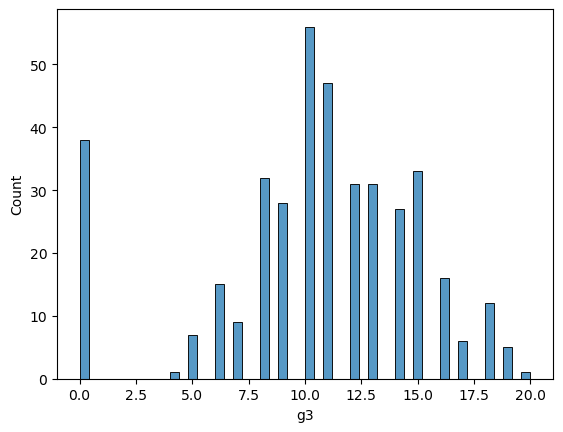

In [10]:
sns.histplot(df.g3, bins=50)

In [11]:
n = len(df)
n

395

In [12]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [13]:
n_val = int( n * 0.2)
n_test = int (n * 0.2)
n_train = n - n_val - n_test
print( n_val, n_test, n_train)
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val: n_val + n_test]
df_train = df.iloc[n_val+n_test : ]

79 79 237


In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = df_train.g3.values
y_val = df_val.g3.values
y_test = df_test.g3.values

In [16]:
del df_train['g3']
del df_val['g3']
del df_test['g3']

## Baseline Modelling

In [17]:
df_train.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2'],
      dtype='object')

In [18]:
base = ['g1', 'g2']

In [19]:
df[base]

,g1,g2
0,5,6
1,5,5
2,7,8
3,15,14
4,6,10
...,...,...
390,9,9
391,14,16
392,10,8
393,11,12


In [20]:
def train_linear_regression(X,y,r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r* np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [21]:
def prepare_X(df):
    df_num = df[base]
    X = df_num.values
    return X

In [22]:
X_train = prepare_X(df_train)

In [29]:
w0, w = train_linear_regression(X_train, y_train, r = 0.1)

In [30]:
w0, w

(-2.5630635463241553, array([0.21938653, 0.97164848]))

In [31]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

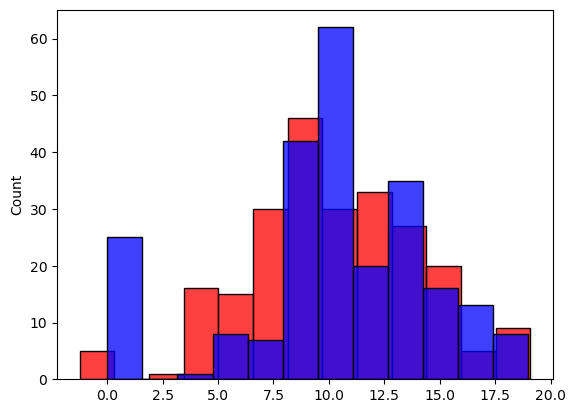

In [32]:
sns.histplot(y_pred, color='red')
sns.histplot(y_train, color = 'blue')

In [33]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [34]:
rmse(y_train, y_pred)

2.176454025383227

## Validatiton for only 2 

In [35]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

1.3207082494826952

<Axes: ylabel='Count'>

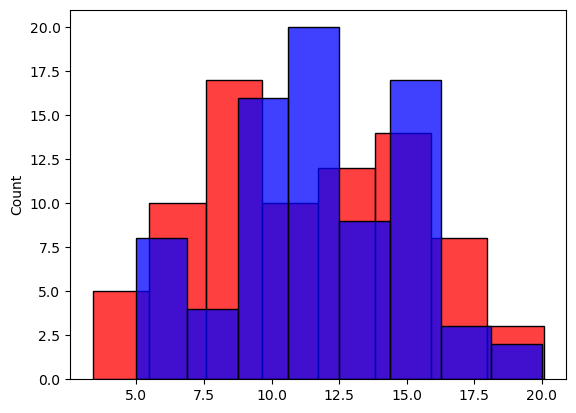

In [36]:
sns.histplot(y_pred, color='red')
sns.histplot(y_val, color = 'blue')

In [37]:
for r in [0.0, 0.1, 0.01, 0.001,0.00001, 10, 1000, 100000, 0.0001, 0.00001]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train, r= r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val,y_pred)
    print (r, w0, score)

0.0 -2.576732521829196 1.3228637744330352
0.1 -2.5630635463241553 1.3207082494826952
0.01 -2.575359100994882 1.3226468223281247
0.001 -2.5765951141703045 1.322842065140743
1e-05 -2.5767311476806456 1.3228635573246392
10 -1.6788055151667922 1.201301217688604
1000 -0.01477593343366667 1.4207433304874915
100000 0.014791614664597347 7.996137167162109
0.0001 -2.5767187804072105 1.3228616033628897
1e-05 -2.5767311476806456 1.3228635573246392


10 'u seçtim pikaçu

In [39]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train, r = 10)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val,y_pred)
print (r, w0, score)

1e-05 -1.6788055151667922 1.201301217688604


In [40]:
df_full_train = pd.concat([df_train, df_val ])

In [41]:
df_full_train = df_full_train.reset_index(drop= True)

In [42]:
X_full_train = prepare_X(df_full_train)


In [43]:
y_full_train = np.concatenate([y_train, y_val])

In [55]:
w0, w = train_linear_regression(X_full_train, y_full_train, r= 10)


In [56]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test,y_pred)
print (w0, score)

-1.3572586055039166 1.6905240680254854


<Axes: ylabel='Count'>

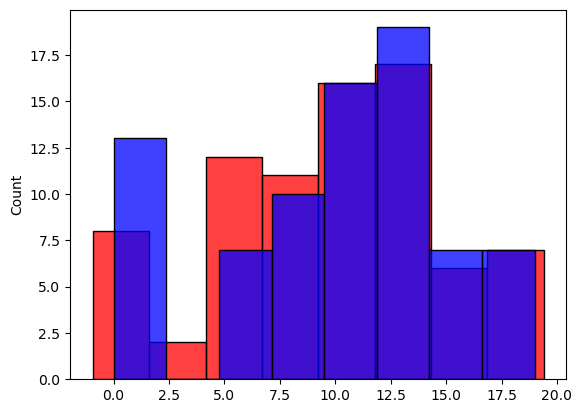

In [57]:
sns.histplot(y_pred, color='red')
sns.histplot(y_test, color = 'blue')

In [58]:
student = df_test.iloc[20].to_dict()
student

{'school': 'GP',
 'sex': 'F',
 'age': 16,
 'address': 'U',
 'famsize': 'GT3',
 'pstatus': 'T',
 'medu': 4,
 'fedu': 3,
 'mjob': 'other',
 'fjob': 'at_home',
 'reason': 'course',
 'guardian': 'mother',
 'traveltime': 1,
 'studytime': 3,
 'failures': 0,
 'schoolsup': 'yes',
 'famsup': 'yes',
 'paid': 'yes',
 'activities': 'no',
 'nursery': 'yes',
 'higher': 'yes',
 'internet': 'yes',
 'romantic': 'no',
 'famrel': 5,
 'freetime': 3,
 'goout': 5,
 'dalc': 1,
 'walc': 1,
 'health': 3,
 'absences': 0,
 'g1': 7,
 'g2': 9}

In [60]:
df_small = pd.DataFrame([student])
df_small

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2
0,GP,F,16,U,GT3,T,4,3,other,at_home,...,no,5,3,5,1,1,3,0,7,9


In [63]:
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
y_pred

array([8.31616681])

In [64]:
y_test[20]

8